This dataset contains the following data:

Timestamp

Age

Gender

Country

state: If you live in the United States, which state or territory do you live in?

self_employed: Are you self-employed?

family_history: Do you have a family history of mental illness?

treatment: Have you sought treatment for a mental health condition?

work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

no_employees: How many employees does your company or organization have?

remote_work: Do you work remotely (outside of an office) at least 50% of the time?

tech_company: Is your employer primarily a tech company/organization?

benefits: Does your employer provide mental health benefits?

care_options: Do you know the options for mental health care your employer provides?

wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

leave: How easy is it for you to take medical leave for a mental health condition?

mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

coworkers: Would you be willing to discuss a mental health issue with your coworkers?

supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?

phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?

mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

comments: Any additional notes or comments

Inspiration
Some questions worth exploring:

How does the frequency of mental health illness and attitudes towards mental health vary by geographic location?
What are the strongest predictors of mental health illness or certain attitudes towards mental health in the workplace?

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/survey.csv")
df.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [7]:
df.shape
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,NaN,49,48,45,2,2,2,4,6,...,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:44:51,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,615,751,138,1095,767,637,465,290,...,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
missing = df.isna().sum().sort_values(ascending=False)
missing_ratio = (df.isna().mean() * 100).sort_values(ascending=False)

pd.concat([missing, missing_ratio], axis=1, keys=["missing", "missing_ratio (%)"])

,missing,missing_ratio (%)
comments,1095,86.973789
state,515,40.905481
work_interfere,264,20.969023
self_employed,18,1.429706
seek_help,0,0.000000
obs_consequence,0,0.000000
mental_vs_physical,0,0.000000
phys_health_interview,0,0.000000
mental_health_interview,0,0.000000
supervisor,0,0.000000


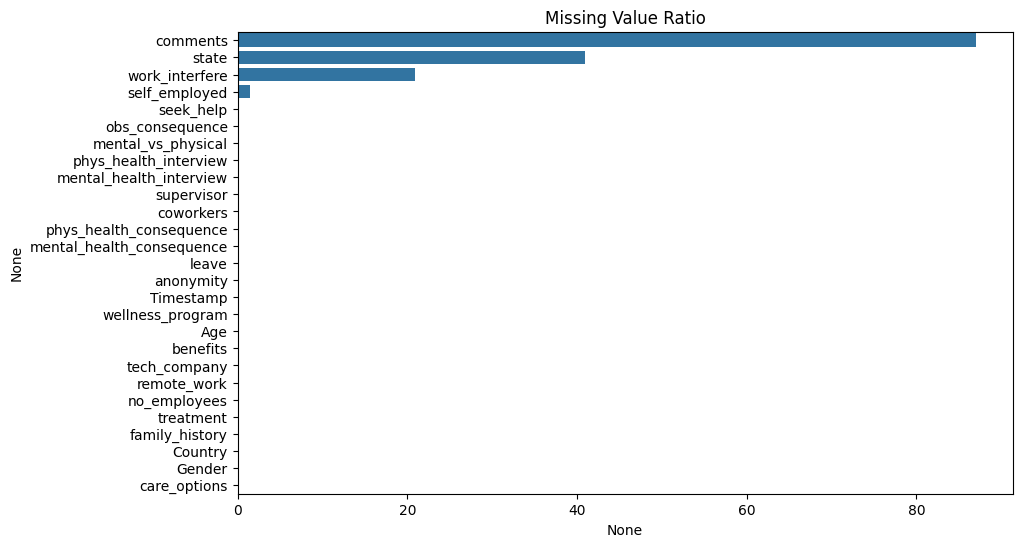

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(x=missing_ratio, y=missing_ratio.index)
plt.title("Missing Value Ratio")
plt.show()

treatment
Yes    637
No     622
Name: count, dtype: int64

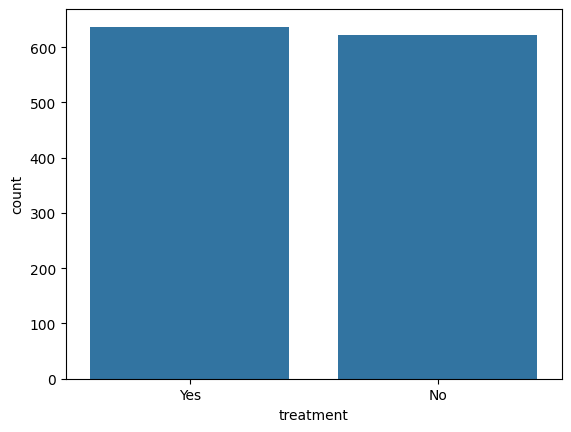

In [14]:
sns.countplot(x=df["treatment"])
df["treatment"].value_counts() #normalize=True

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
364,2014-08-27 15:05:21,329,Male,United States,OH,No,No,Yes,Often,6-25,...,Don't know,Maybe,No,Some of them,No,No,No,No,No,NaN
390,2014-08-27 15:24:47,99999999999,All,Zimbabwe,NaN,Yes,Yes,Yes,Often,1-5,...,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes,NaN


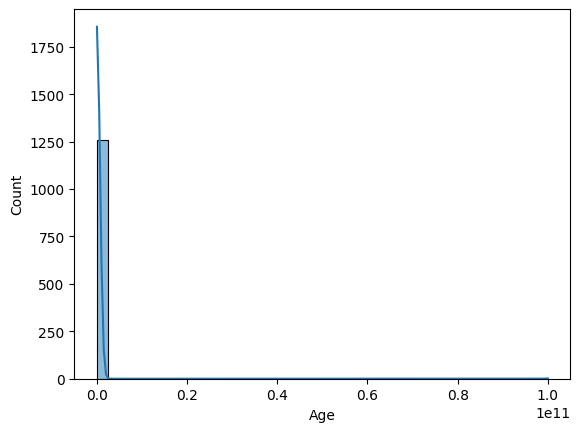

In [16]:
sns.histplot(df["Age"], bins=40, kde=True)

In [25]:
df[(df["Age"] < 10) | (df["Age"] > 100)]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
143,2014-08-27 12:39:14,-29,Male,United States,MN,No,No,No,NaN,More than 1000,...,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN
364,2014-08-27 15:05:21,329,Male,United States,OH,No,No,Yes,Often,6-25,...,Don't know,Maybe,No,Some of them,No,No,No,No,No,NaN
390,2014-08-27 15:24:47,99999999999,All,Zimbabwe,NaN,Yes,Yes,Yes,Often,1-5,...,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes,NaN
715,2014-08-28 10:07:53,-1726,male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No,NaN
734,2014-08-28 10:35:55,5,Male,United States,OH,No,No,No,NaN,100-500,...,Somewhat easy,No,No,Yes,Yes,No,No,Yes,No,We had a developer suffer from depression and ...
989,2014-08-29 09:10:58,8,A little about you,"Bahamas, The",IL,Yes,Yes,Yes,Often,1-5,...,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,
1127,2014-08-30 20:55:11,-1,p,United States,AL,Yes,Yes,Yes,Often,1-5,...,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,password: testered


In [27]:
df["Gender"].value_counts().head(500)

Gender
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter               

<Axes: xlabel='count', ylabel='Gender'>

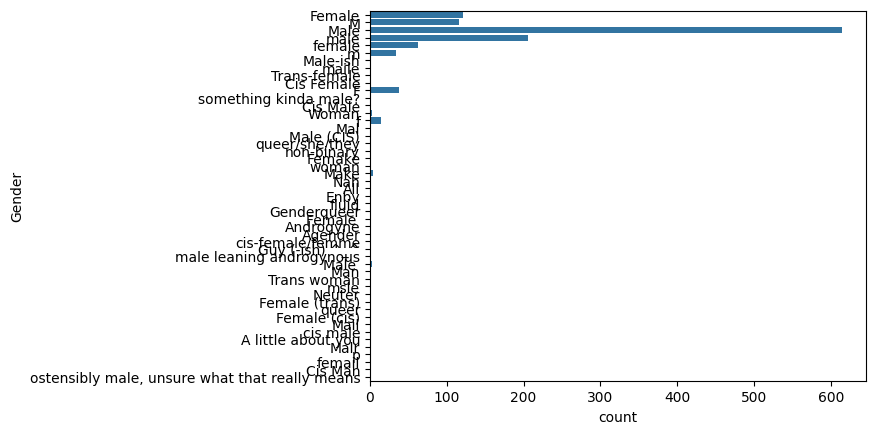

In [29]:
sns.countplot(y=df["Gender"])

<Axes: ylabel='Country'>

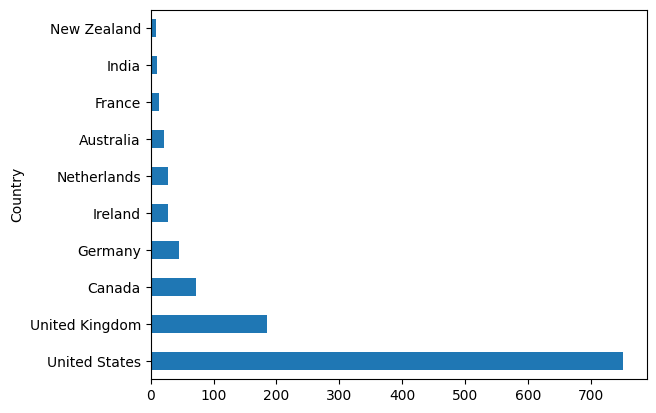

In [31]:
df["Country"].value_counts().head(10).plot(kind="barh")

<Axes: ylabel='no_employees'>

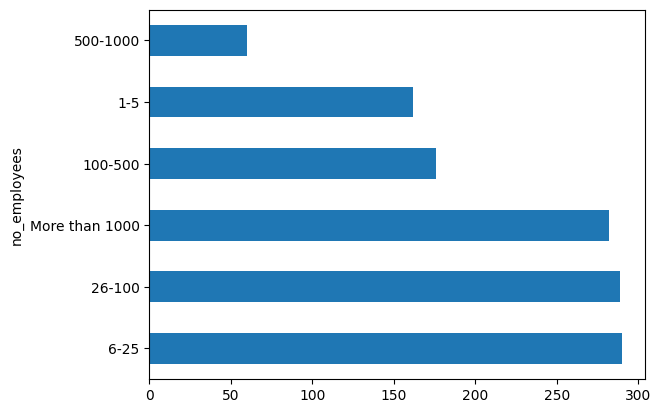

In [39]:
df["no_employees"].value_counts().head(10).plot(kind="barh")

<Axes: xlabel='tech_company', ylabel='count'>

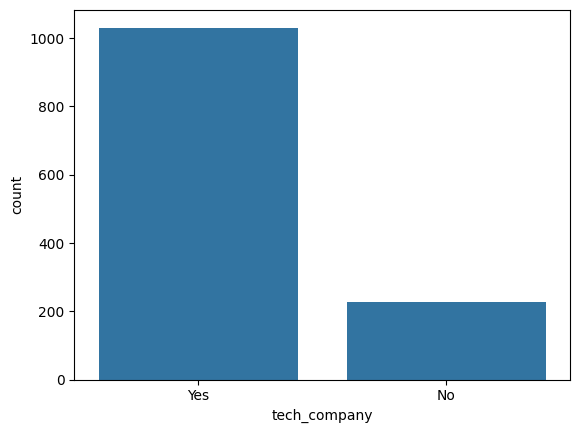

In [32]:
sns.countplot(x=df["tech_company"])

<Axes: xlabel='family_history', ylabel='count'>

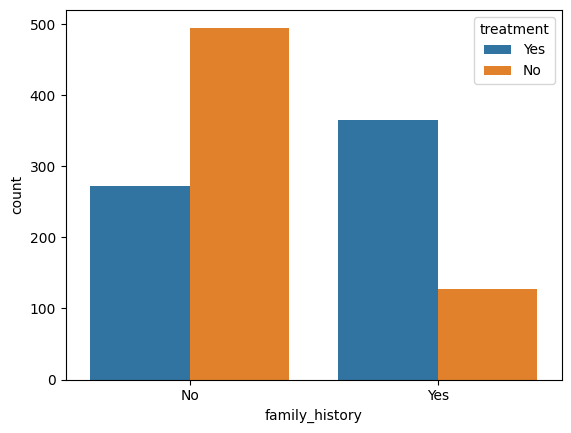

In [33]:
sns.countplot(x="family_history", hue="treatment", data=df)

<Axes: xlabel='self_employed', ylabel='count'>

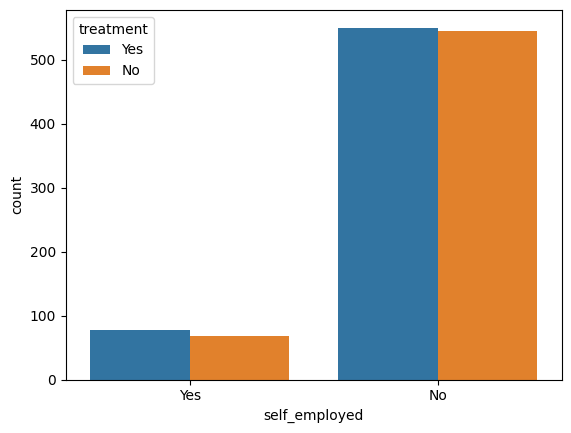

In [38]:
sns.countplot(x="self_employed", hue="treatment", data=df)

<Axes: xlabel='remote_work', ylabel='count'>

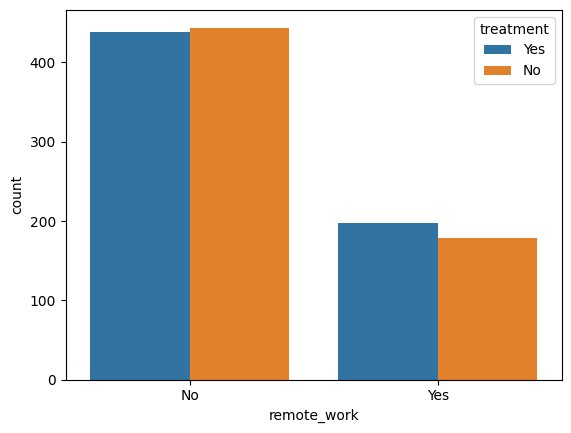

In [40]:
sns.countplot(x="remote_work", hue="treatment", data=df)

<Axes: xlabel='benefits', ylabel='count'>

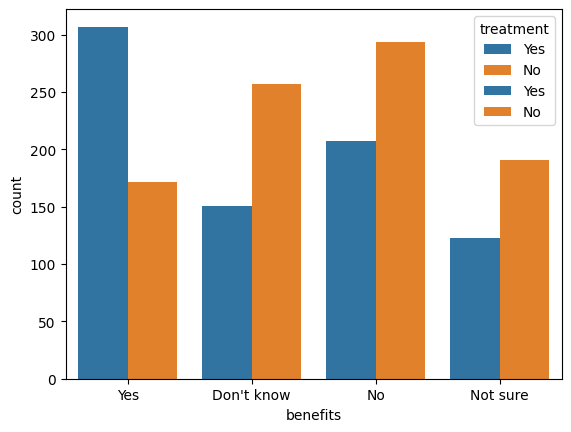

In [42]:
sns.countplot(x="benefits", hue="treatment", data=df)

<Axes: xlabel='care_options', ylabel='count'>

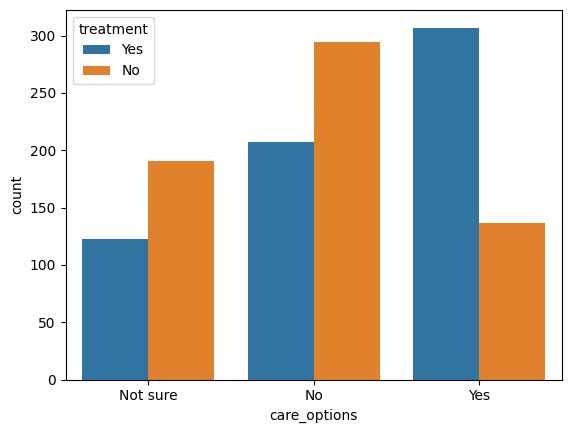

In [43]:
sns.countplot(x="care_options", hue="treatment", data=df)

<Axes: xlabel='seek_help', ylabel='count'>

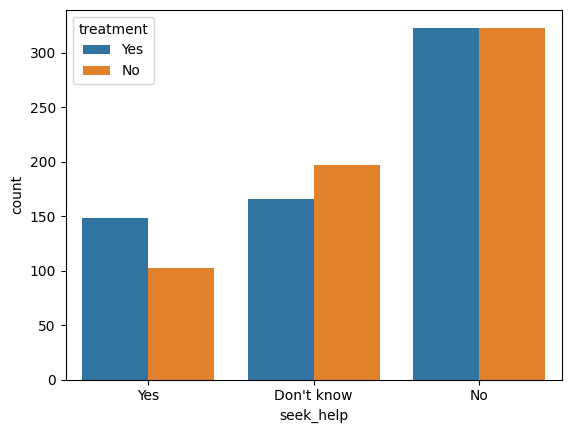

In [45]:
sns.countplot(x="seek_help", hue="treatment", data=df)

<Axes: xlabel='work_interfere', ylabel='count'>

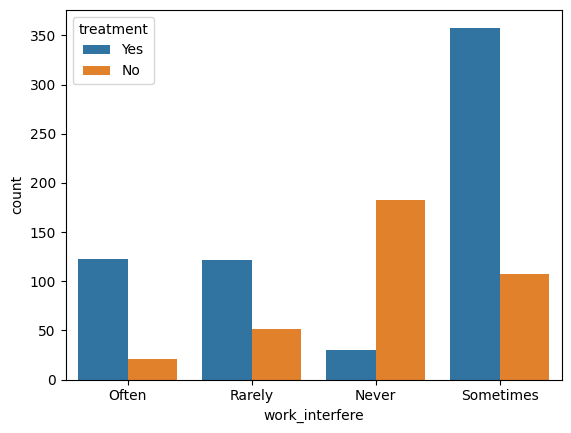

In [34]:
sns.countplot(x="work_interfere", hue="treatment", data=df)

<Axes: xlabel='anonymity', ylabel='count'>

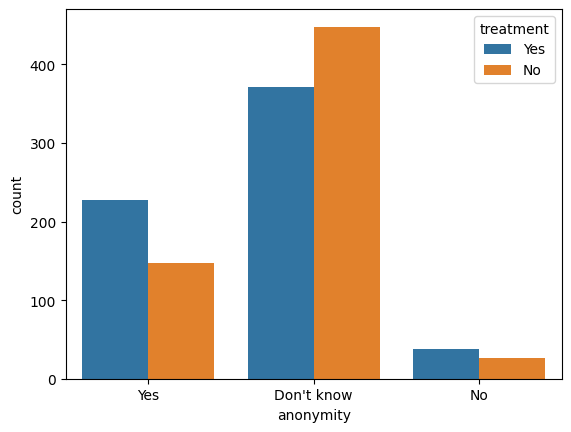

In [46]:
sns.countplot(x="anonymity", hue="treatment", data=df)

<Axes: xlabel='leave', ylabel='count'>

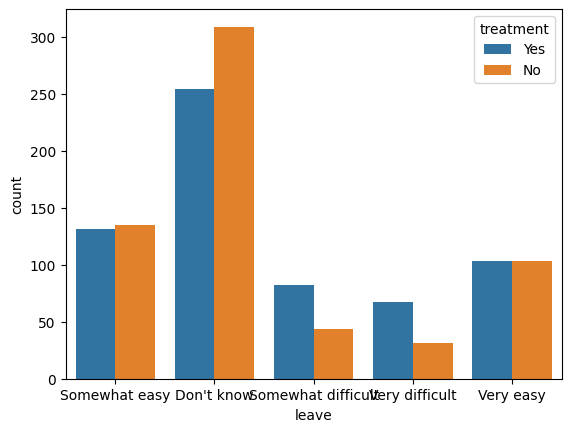

In [47]:
sns.countplot(x="leave", hue="treatment", data=df)

<Axes: xlabel='mental_health_consequence', ylabel='count'>

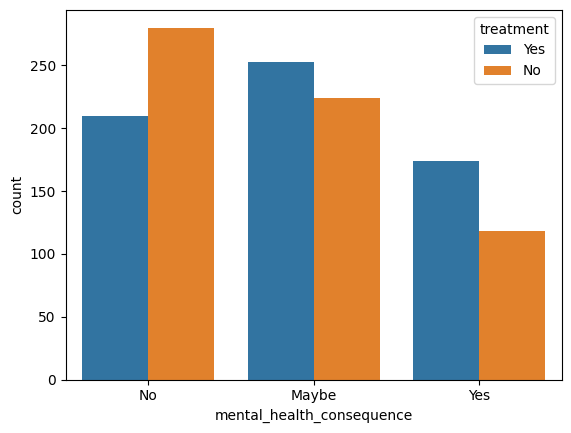

In [48]:
# Do you think that discussing a mental health issue with your employer would have negative consequences?
sns.countplot(x="mental_health_consequence", hue="treatment", data=df)

In [50]:
sns.countplot(x="phys_health_consequence", hue="treatment", data=df)

ValueError: Could not interpret value `coworkers:` for `x`. An entry with this name does not appear in `data`.

<Axes: xlabel='coworkers', ylabel='count'>

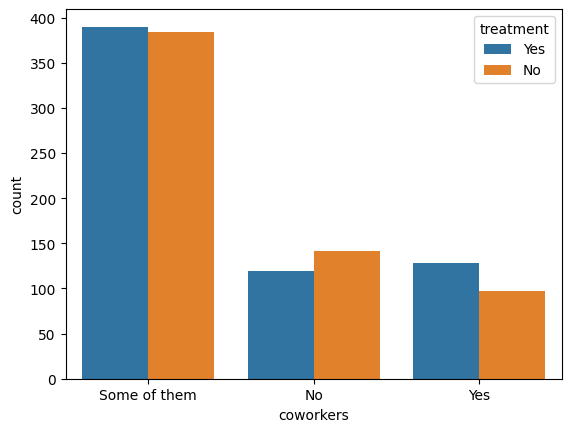

In [51]:
sns.countplot(x="coworkers", hue="treatment", data=df)

<Axes: xlabel='supervisor', ylabel='count'>

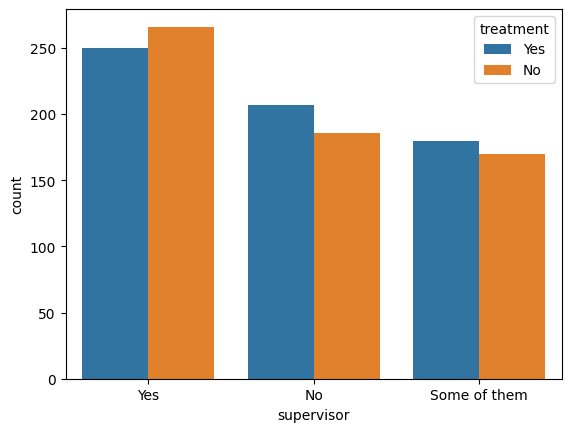

In [52]:
sns.countplot(x="supervisor", hue="treatment", data=df)

<Axes: xlabel='mental_health_interview', ylabel='count'>

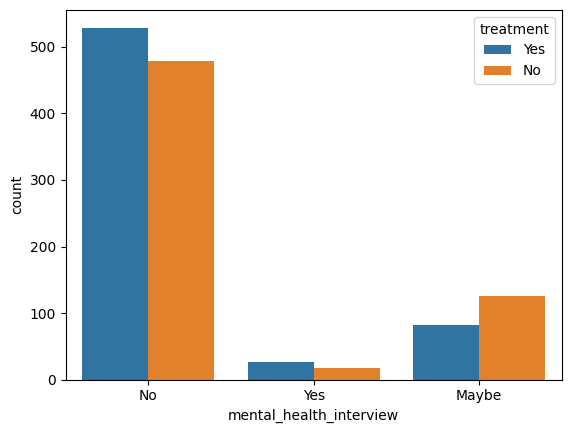

In [53]:
sns.countplot(x="mental_health_interview", hue="treatment", data=df)

<Axes: xlabel='phys_health_interview', ylabel='count'>

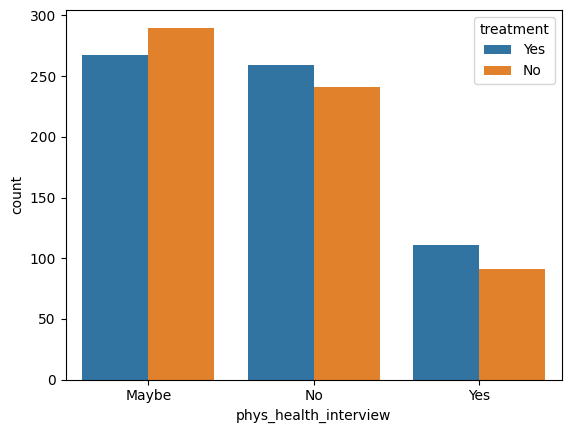

In [54]:
sns.countplot(x="phys_health_interview", hue="treatment", data=df)

<Axes: xlabel='mental_vs_physical', ylabel='count'>

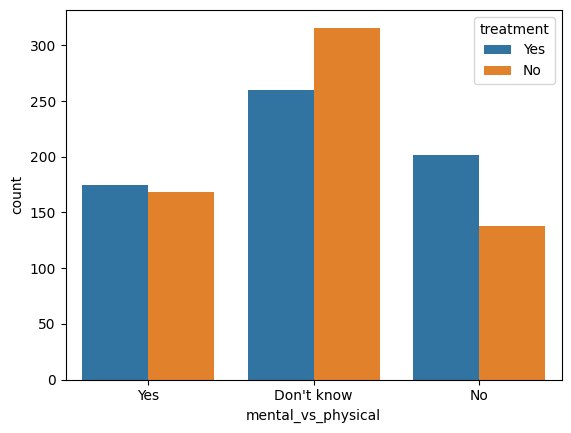

In [55]:
sns.countplot(x="mental_vs_physical", hue="treatment", data=df)

<Axes: xlabel='obs_consequence', ylabel='count'>

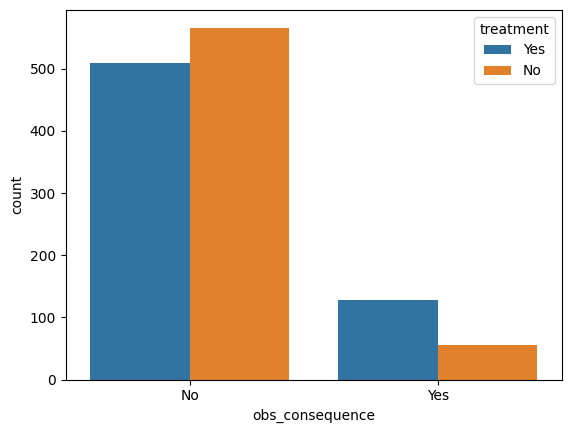

In [56]:
sns.countplot(x="obs_consequence", hue="treatment", data=df)

<Axes: >

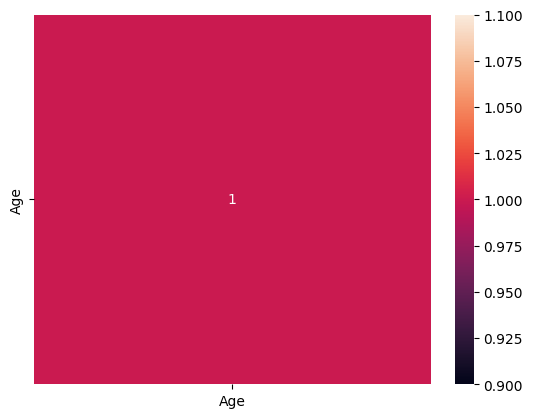

In [36]:
df_corr = df[["Age"]].corr()
sns.heatmap(df_corr, annot=True)

In [64]:
mask = df["comments"].fillna("").str.strip() != ""

df.loc[mask, ["comments"]].to_csv("comments_only.csv", index=False)